In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Acceptance rates

In [34]:
def acc_rates(a_list,start=1,size=10,lamb=0.0):
    for a in a_list:
        epsilons = np.arange(0,2.2,0.2)
        acc_rates = []
        stderrs = []
        for epsilon in epsilons:
            df = pd.read_csv(f"./Datos/Oscillator/acc_rates/start_{start}_eps_{epsilon:0.2f}_size_{size}_a_{a:0.2f}_lambda_{lamb:0.2f}.csv")


            acc_rates += [df["acc_rate"].mean()]
            stderrs += [np.sqrt(df["acc_rate"].var()/len(df))]

        plt.errorbar(epsilons,acc_rates,stderrs,marker="o",ls="-",ecolor="k",label=f"a={a:0.2f}")
    plt.xlabel("Epsion")
    plt.ylabel("Acc rates")
    plt.title(f"Acceptance rates\n lambda={lamb:0.2f}\n  size={size}, start={start}, samples = 1000")
    plt.xticks(np.arange(0,2.2,0.2))
    plt.grid()
    plt.legend()
    plt.show()

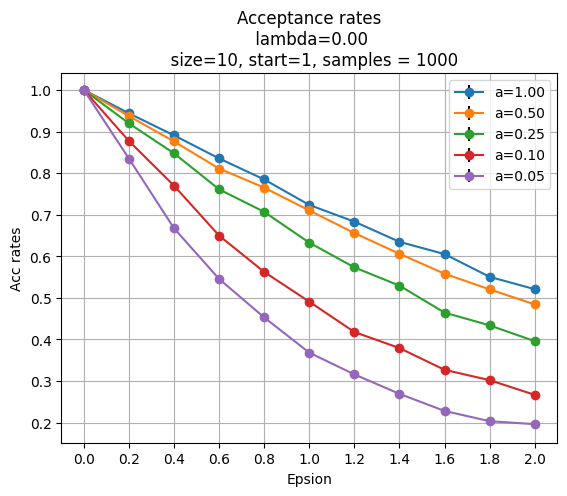

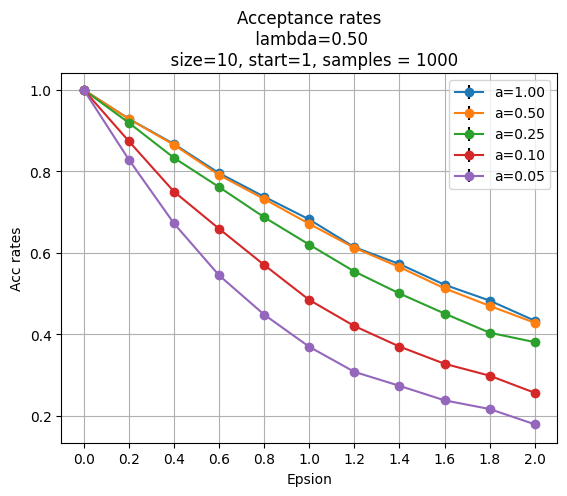

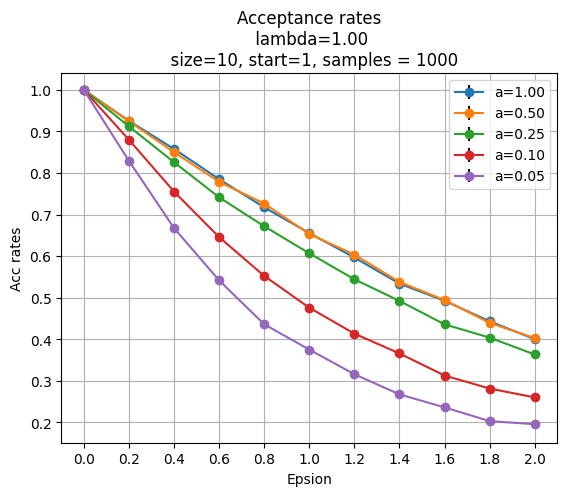

In [35]:
a_list = [1.0,0.5,0.25,0.1,0.05]
acc_rates(a_list,lamb=0.0)
acc_rates(a_list,lamb=0.5)
acc_rates(a_list,lamb=1.0)

In [ ]:
eps_0={1.00:0.7,
       0.50:0.7,
       0.25:0.7,
       0.10:0.7,
       0.05:0.7}


### Action vs sweeps


In [28]:
def hot_cold(epsilon,size,a,lamb):
    df0 = pd.read_csv(f"./Datos/Oscillator/SE/start_0_eps_{epsilon:0.2f}_size_{size}_a_{a:0.2f}_lambda_{lamb:0.2f}.csv")
    df1 = pd.read_csv(f"./Datos/Oscillator/SE/start_1_eps_{epsilon:0.2f}_size_{size}_a_{a:0.2f}_lambda_{lamb:0.2f}.csv")
    

    termalization = 10000
    steps = 10

    x0 = df0["sweep"].iloc[termalization::steps]
    y0 = df0["S_E"].iloc[termalization::steps]
    x1 = df1["sweep"].iloc[termalization::steps]
    y1 = df1["S_E"].iloc[termalization::steps]

    plt.figure(figsize=(20,5))
    plt.plot(x0,y0,marker="o",alpha=0.5,color="blue",label=f"Cold start: mean = {y0.mean():0.2f}$\pm${np.sqrt(y0.var()/len(y0)):0.2f}")
    plt.plot(x1,y1,marker="s",alpha=0.5,color="red",label=f"Hot start: mean = {y1.mean():0.2f}$\pm${np.sqrt(y1.var()/len(y1)):0.2f}")

    plt.axhline(y0.mean(),color = "k", label = "cold mean")
    plt.axhline(y1.mean(),color = "grey", label = "hot mean")

    plt.title(f"$S_E$ vs sweeps\n sweeps:{len(df0)}\n termalization: {termalization}, steps: {steps}\n a={a:0.2f}, measurements = {len(x1)}, $\lambda$={lamb:0.2f}")
    plt.xlabel("sweeps")
    plt.xlim(10000,10500)
    plt.ylabel("$S_E$")
    plt.legend()
    plt.show()
    

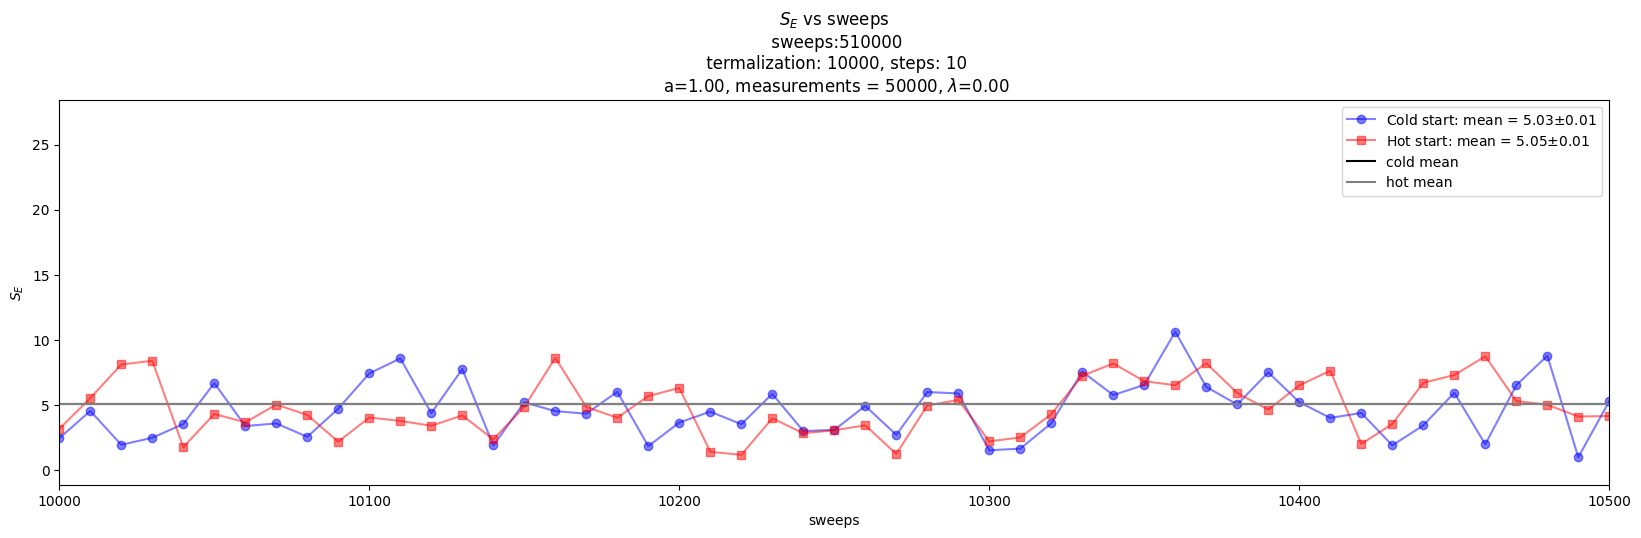

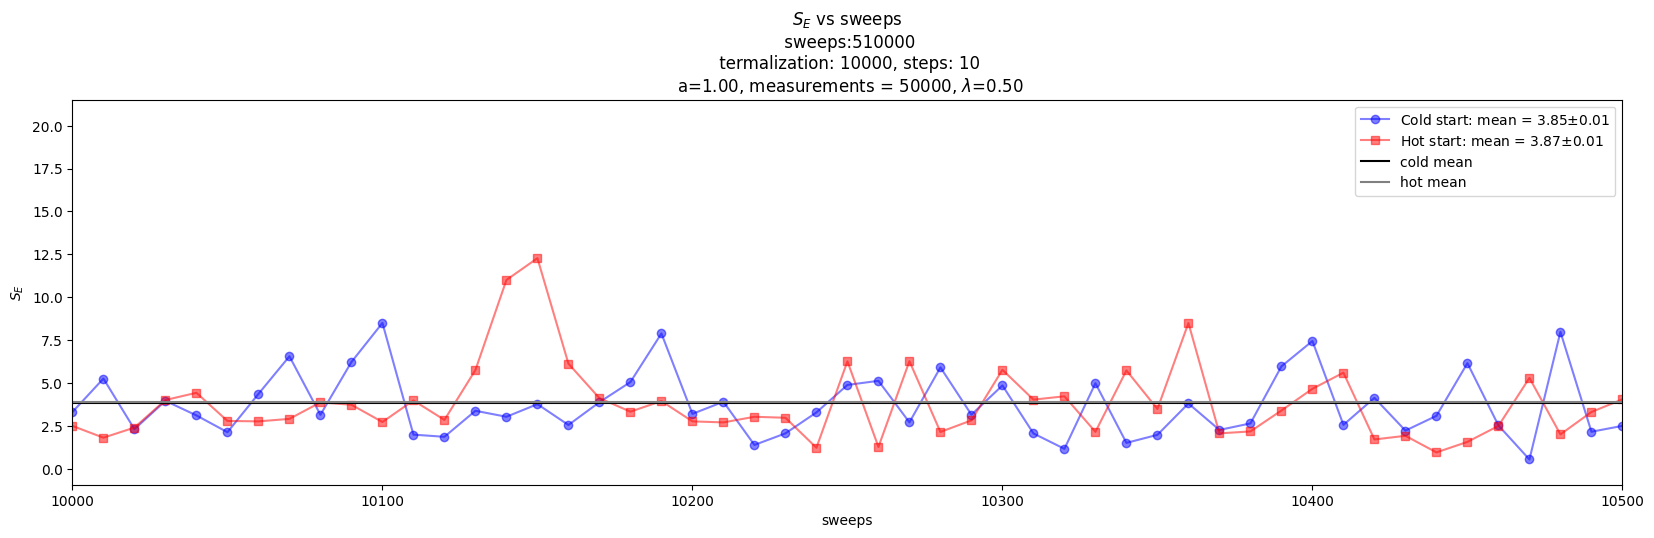

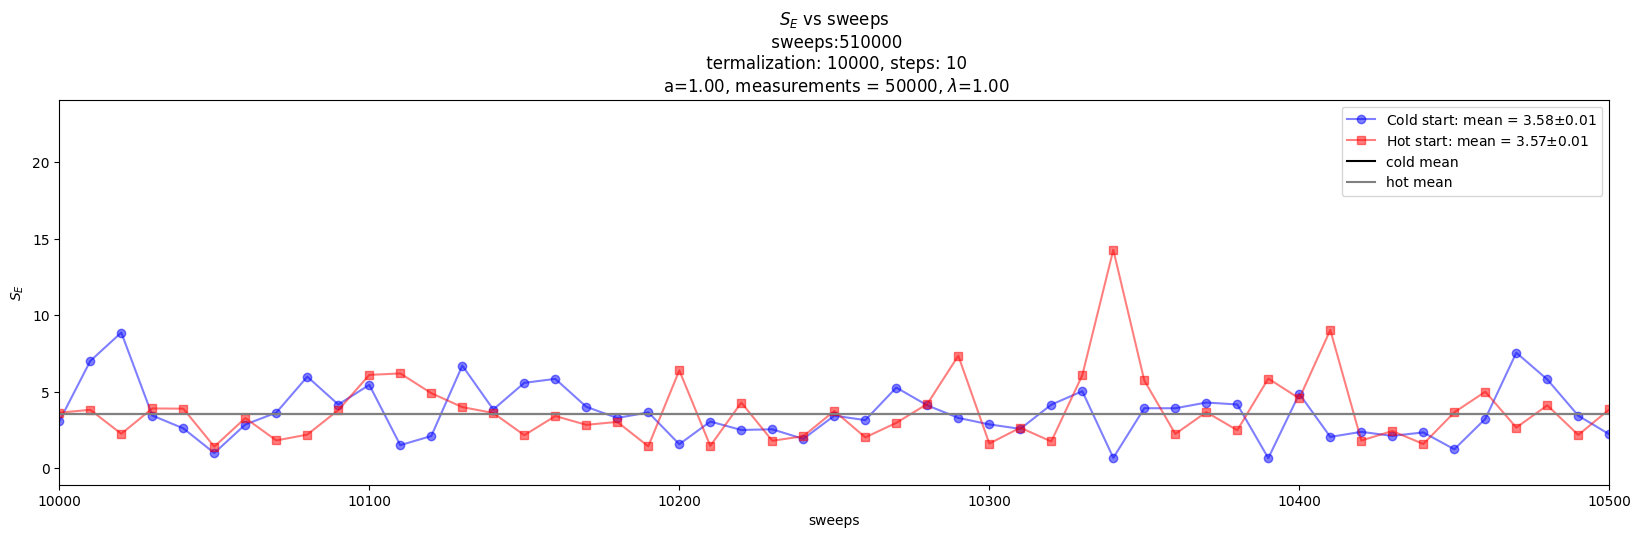

In [29]:
SIZE = 10
epsilon = 0.7
a = 1
lamb=0
hot_cold(epsilon,SIZE,a,lamb)
SIZE = 10
epsilon = 0.7
a = 1
lamb=0.5
hot_cold(epsilon,SIZE,a,lamb)
SIZE = 10
epsilon = 0.7
a = 1
lamb=1
hot_cold(epsilon,SIZE,a,lamb)

In [106]:
def ground_state_hot(a_list,epsilon,size=10,start=1,lamb=0.0):
    e_0=[]
    ind=0
    for a in a_list:
        x = pd.read_csv(f"./Datos/Oscillator/trayec/start_{start}_eps_{epsilon:0.2f}_size_{size}_a_{a:0.2f}_lambda_{lamb:0.2f}.csv")
        
        e_0 += [np.mean(x[str(ind)]**2)]
    
    e_0=np.array(e_0)
    plt.errorbar(a_list,e_0,marker="o")
    plt.xlabel("a")
    plt.ylabel("$E_0$")
    plt.show()

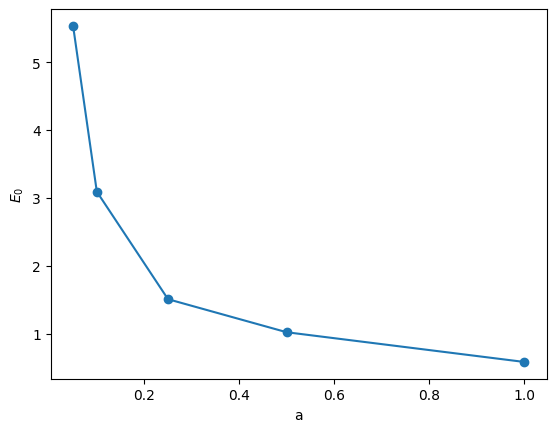

In [107]:
a_list = [1.0,0.5,0.25,0.1,0.05]
ground_state_hot(a_list,epsilon=0.7,lamb=0.0)

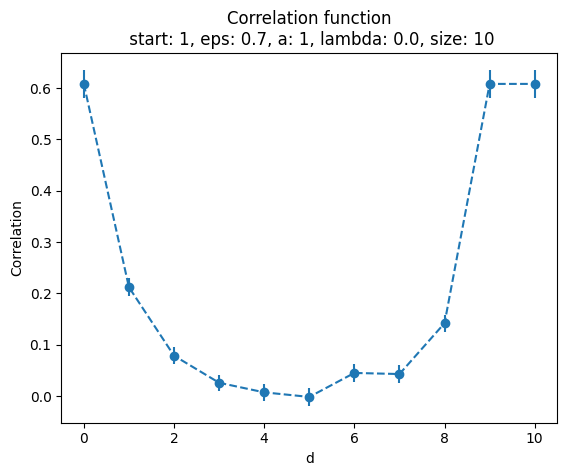

In [15]:
size = 10
start = 1
eps = 0.7
a = 1
lamb = 0.0

df = pd.read_csv("./Datos/Oscillator/corr/start_1_eps_0.70_size_10_a_1.00_lambda_0.00.csv")

df["index"] = df.groupby("d").cumcount()
df = df.pivot(index='index', columns='d', values='corr').reset_index(drop=True)

dic = {"d":np.arange(size+1),
    "corr": np.append(df.mean().to_numpy(), df.mean().to_numpy()[0]),
    "stderr":np.append(np.sqrt(df.var() / len(df)).to_numpy(), np.sqrt(df.var() / len(df)).to_numpy()[0])}

x = dic["d"]
y = dic["corr"]
yerr = dic["stderr"]
plt.errorbar(x,y,yerr,marker="o",ls="--")
plt.title("Correlation function\n start: {start}, eps: {eps}, a: {a}, lambda: {lamb}, size: {size}".format(start=start,eps=eps,a=a,lamb=lamb,size=size))
plt.xlabel("d")
plt.ylabel("Correlation")
plt.show()